<a href="https://colab.research.google.com/github/Annszy1130/Temperature_Prediction_London/blob/main/Temperature_Prediction_London.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The subject of this project is predicting the temperature in London
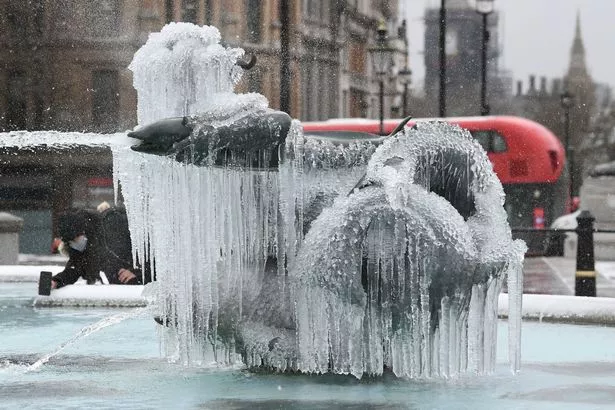

As the climate changes, predicting the weather becomes ever more important for businesses. Since the weather depends on a lot of different factors, you will want to run a lot of experiments to determine what the best approach is to predict the weather. In this project, you will run experiments for different regression models predicting the mean temperature, using a combination of `sklearn` and `MLflow`.

You will be working with data stored in `london_weather.csv`, which contains the following columns:
- **date** - recorded date of measurement - (**int**)
- **cloud_cover** - cloud cover measurement in oktas - (**float**)
- **sunshine** - sunshine measurement in hours (hrs) - (**float**)
- **global_radiation** - irradiance measurement in Watt per square meter (W/m2) - (**float**)
- **max_temp** - maximum temperature recorded in degrees Celsius (°C) - (**float**)
- **mean_temp** - mean temperature in degrees Celsius (°C) - (**float**)
- **min_temp** - minimum temperature recorded in degrees Celsius (°C) - (**float**)
- **precipitation** - precipitation measurement in millimeters (mm) - (**float**)
- **pressure** - pressure measurement in Pascals (Pa) - (**float**)
- **snow_depth** - snow depth measurement in centimeters (cm) - (**float**)


In [ ]:
pip install mlflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 102.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00
  Created wheel for databricks-cli: filename=databricks_cli-0.17.7-py3-none-any.whl size=143860 sha256=709d9315e73a9dbfdc04d5419325102f7229de988fb2a1209e5c20bb1ecd1008
  Stored in directory: /root/.cache/pip/wheels/

## 1. In the first step, I'm importing the necessary libraries 

In [ ]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## 2. Load The Data

In [ ]:
# Load data and perform exploratory analysis
weather=pd.read_csv('/content/drive/MyDrive/ Temperature_Prediction_London /london_weather.csv')
weather.head(5)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


## 3. Exploratory data analysis 


In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [ ]:
weather.describe()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
count,1.534100e+04,15322.000000,15341.000000,15322.000000,15335.000000,15305.000000,15339.000000,15335.000000,15337.000000,13900.000000
mean,1.999567e+07,5.268242,4.350238,118.756951,15.388777,11.475511,7.559867,1.668634,101536.605594,0.037986
std,1.212176e+05,2.070072,4.028339,88.898272,6.554754,5.729709,5.326756,3.738540,1049.722604,0.545633
min,1.979010e+07,0.000000,0.000000,8.000000,-6.200000,-7.600000,-11.800000,0.000000,95960.000000,0.000000
25%,1.989070e+07,4.000000,0.500000,41.000000,10.500000,7.000000,3.500000,0.000000,100920.000000,0.000000
50%,2.000010e+07,6.000000,3.500000,95.000000,15.000000,11.400000,7.800000,0.000000,101620.000000,0.000000
75%,2.010070e+07,7.000000,7.200000,186.000000,20.300000,16.000000,11.800000,1.600000,102240.000000,0.000000
max,2.020123e+07,9.000000,16.000000,402.000000,37.900000,29.000000,22.300000,61.800000,104820.000000,22.000000


In [ ]:
weather['date'] = pd.to_datetime(weather['date'], format='%Y%m%d')
weather['year'] = weather['date'].dt.year
weather['month'] = weather['date'].dt.month
weather_metrics = ['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth']
weather_per_month = weather.groupby(['year', 'month'], as_index = False)[weather_metrics].mean()
weather.head(5)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,year,month
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979,1
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979,1
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979,1
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979,1
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979,1


<ipython-input-10-d9bc32d834fb>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="year", y="mean_temp", data=weather_per_month, ci=None)


<Axes: xlabel='year', ylabel='mean_temp'>

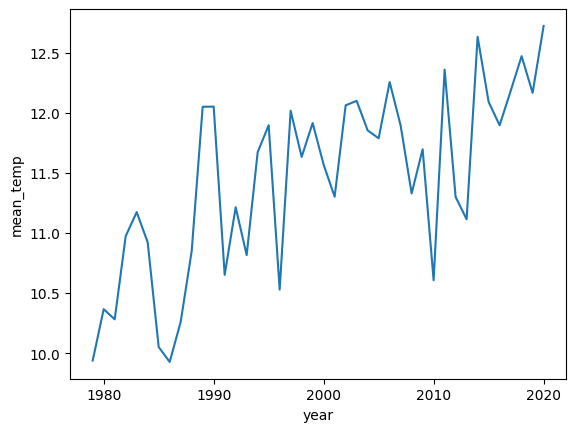

In [ ]:
sns.lineplot(x="year", y="mean_temp", data=weather_per_month, ci=None)

<Axes: xlabel='month', ylabel='precipitation'>

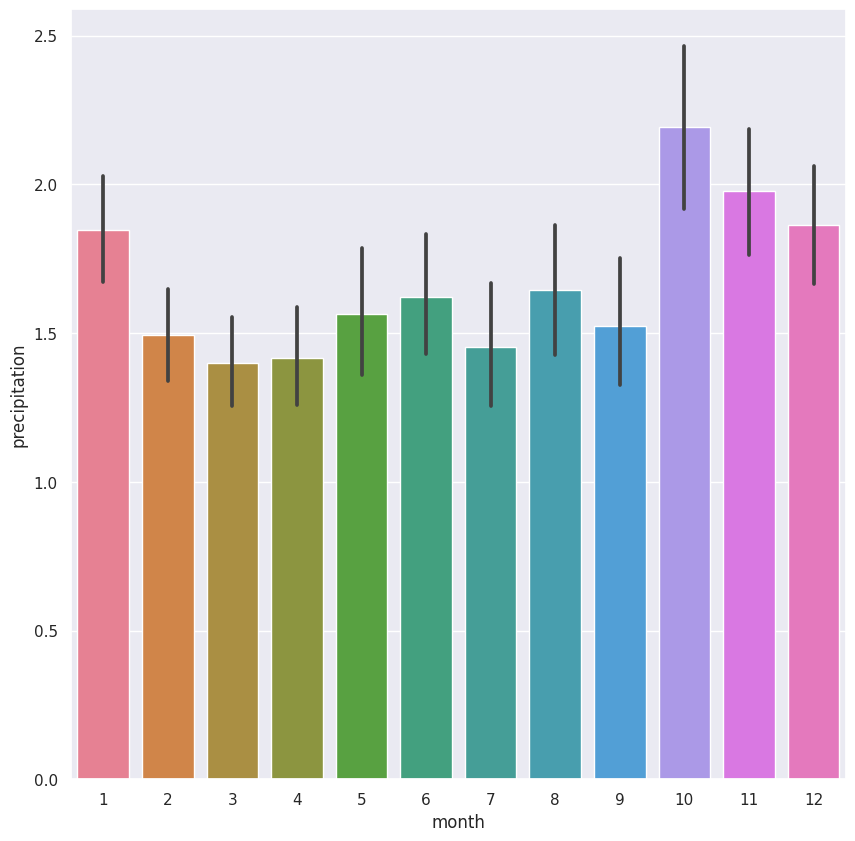

In [ ]:
sns.barplot(x='month', y='precipitation', data=weather, palette="husl")

<ipython-input-14-9d9be5bf01a8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(weather.corr(), annot=True, cmap="viridis")


<Axes: >

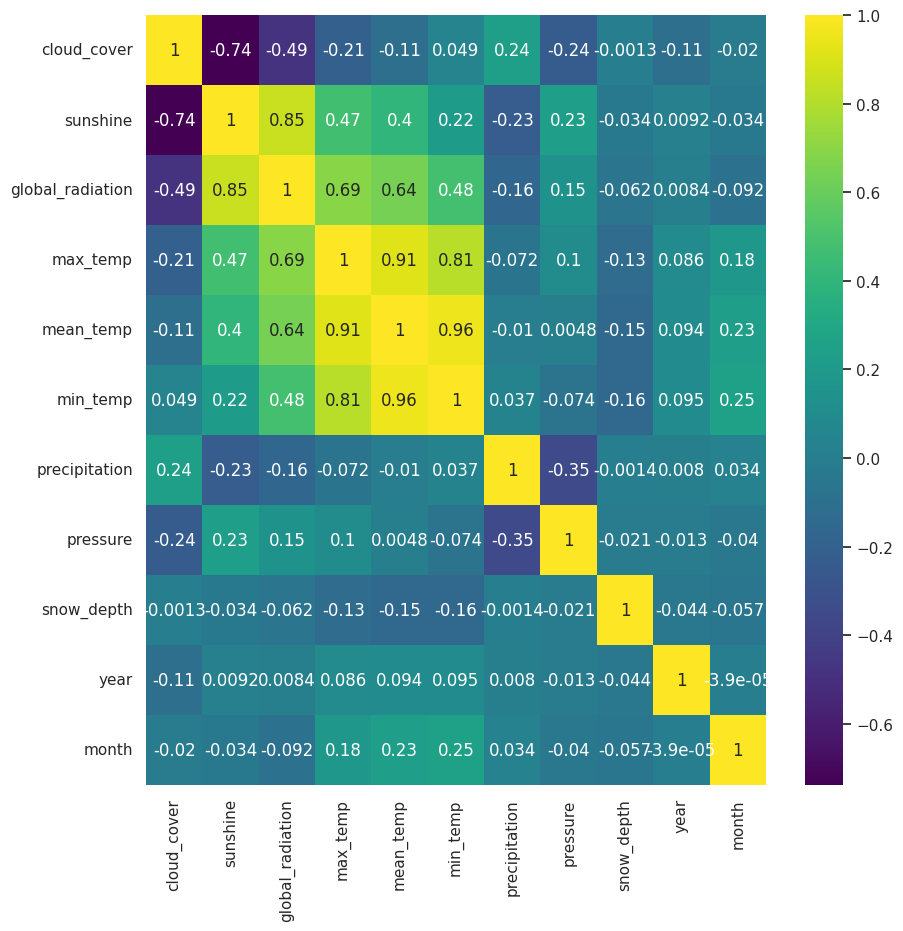

In [ ]:
sns.set (rc = {'figure.figsize':(10, 10)})
sns.heatmap(weather.corr(), annot=True, cmap="viridis")


In [ ]:
# Choose features, define the target, and drop null values
feature_selection = ['month', 'cloud_cover', 'sunshine', 'precipitation', 'pressure', 'global_radiation']
target_var = 'mean_temp'
weather = weather.dropna(subset=['mean_temp'])

In [ ]:
def preprocess_df(df, feature_selection, target_var):
    """
    Split dataframe into X and y, and train and test consecutively. Then impute and scale both train and test features. Returns the train and test ets
    """
    # Complete this function
    X = df[feature_selection]    
    y = df[target_var]
    #split the data into train and test 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # simple imputer to fill the null value  
    imp_data=SimpleImputer(strategy='mean')
    X_train=imp_data.fit_transform(X_train)
    X_test=imp_data.transform(X_test)
    # Scale The Data 
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = preprocess_df(weather, feature_selection, target_var)

In [ ]:
# Predict on the test set and evaluate performance
def predict_and_evaluate(model, x_test, y_test):
    """
    Predict values from test set, calculate and return the root mean squared error.
    """
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))    
    return rmse

In [ ]:
# Create an experiment
EXPERIMENT_NAME = "weather_prediction"
EXPERIMENT_ID = mlflow.create_experiment(EXPERIMENT_NAME)

In [ ]:
# Predict, evaluate, and log the parameters and metrics of your models
for idx, depth in enumerate([1, 2, 5, 10, 20]):
    parameters = {
        'max_depth': depth
    }    
    run_name = f"run_{idx}"
    with mlflow.start_run(experiment_id=EXPERIMENT_ID, run_name=run_name):
        # Create models
        lin_reg = LinearRegression().fit(X_train, y_train)
        tree_reg = DecisionTreeRegressor(random_state=42, max_depth=depth).fit(X_train, y_train)
        forest_reg = RandomForestRegressor(random_state=42, max_depth=depth).fit(X_train, y_train)
        # Log models
        mlflow.sklearn.log_model(lin_reg, "lin_reg")
        mlflow.sklearn.log_model(tree_reg, "tree_reg")
        mlflow.sklearn.log_model(forest_reg, "forest_reg")
        # Evaluate performance
        lin_reg_rmse = predict_and_evaluate(lin_reg, X_test, y_test)
        tree_reg_rmse = predict_and_evaluate(tree_reg, X_test, y_test)
        forest_reg_rmse = predict_and_evaluate(forest_reg, X_test, y_test)
        # Log performance
        mlflow.log_param("max_depth", depth)
        mlflow.log_metric("rmse_lr", lin_reg_rmse)
        mlflow.log_metric("rmse_tr", tree_reg_rmse)
        mlflow.log_metric("rmse_fr", forest_reg_rmse)

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [ ]:
# Search the runs for the experiment's results
experiment_results = mlflow.search_runs(experiment_names=[EXPERIMENT_NAME])
experiment_results

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.rmse_fr,metrics.rmse_lr,metrics.rmse_tr,params.max_depth,tags.mlflow.user,tags.mlflow.source.name,tags.mlflow.runName,tags.mlflow.log-model.history,tags.mlflow.source.type
0,2538bbaf10e546f4bb5d52c0c2d50316,679516379238357903,FINISHED,file:///content/mlruns/679516379238357903/2538...,2023-06-09 15:04:54.886000+00:00,2023-06-09 15:05:04.097000+00:00,2.878634,3.673185,3.930670,20,root,/usr/local/lib/python3.10/dist-packages/ipyker...,run_4,"[{""run_id"": ""2538bbaf10e546f4bb5d52c0c2d50316""...",LOCAL
1,3e678a39de66493b9cc77d5aa663125d,679516379238357903,FINISHED,file:///content/mlruns/679516379238357903/3e67...,2023-06-09 15:04:47.617000+00:00,2023-06-09 15:04:54.883000+00:00,2.788197,3.673185,3.038971,10,root,/usr/local/lib/python3.10/dist-packages/ipyker...,run_3,"[{""run_id"": ""3e678a39de66493b9cc77d5aa663125d""...",LOCAL
2,cbbe665751cd488a8425da051ae74acb,679516379238357903,FINISHED,file:///content/mlruns/679516379238357903/cbbe...,2023-06-09 15:04:41.006000+00:00,2023-06-09 15:04:47.611000+00:00,2.920368,3.673185,2.969909,5,root,/usr/local/lib/python3.10/dist-packages/ipyker...,run_2,"[{""run_id"": ""cbbe665751cd488a8425da051ae74acb""...",LOCAL
3,1588751a513e4a92bc2eface76db4653,679516379238357903,FINISHED,file:///content/mlruns/679516379238357903/1588...,2023-06-09 15:04:31.417000+00:00,2023-06-09 15:04:41.003000+00:00,3.778498,3.673185,3.855133,2,root,/usr/local/lib/python3.10/dist-packages/ipyker...,run_1,"[{""run_id"": ""1588751a513e4a92bc2eface76db4653""...",LOCAL
4,90aed96715854f408de3b93a6eb0847a,679516379238357903,FINISHED,file:///content/mlruns/679516379238357903/90ae...,2023-06-09 15:04:24.465000+00:00,2023-06-09 15:04:31.413000+00:00,4.621091,3.673185,4.686188,1,root,/usr/local/lib/python3.10/dist-packages/ipyker...,run_0,"[{""run_id"": ""90aed96715854f408de3b93a6eb0847a""...",LOCAL
